In [427]:
import sys

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [429]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [430]:
data = pd.read_csv('data/coupons.csv')

In [431]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [432]:
print(data.shape)
# Get the summary of missing values by columns
print(data.isna().sum())

(12684, 26)
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [435]:
# We can either drop or fill the missing values, dropping rows for missing data seriously impacts the data availability.  
# So, our strategy is to fill the data with imputing.
# For numeric data, we can fill data either with average, mode or median values. Other strategy could be either forward/backward fill or interpolate.
# Since the missing data is categorical data, we would fill it with most frequently used value 

data.fillna({'car': data['car'].mode()[0]}, inplace = True)
data.fillna({'Bar': data['Bar'].mode()[0]}, inplace = True)
data.fillna({'CoffeeHouse': data['CoffeeHouse'].mode()[0]}, inplace = True)
data.fillna({'CarryAway': data['CarryAway'].mode()[0]}, inplace = True)
data.fillna({'RestaurantLessThan20': data['RestaurantLessThan20'].mode()[0]}, inplace = True)
data.fillna({'Restaurant20To50': data['Restaurant20To50'].mode()[0]}, inplace = True)

print(data.isna().sum())
data.shape
# Other strategy is to fill with values mentioned as static dictionary, specifying an independant and specific value for each column.
#df = data.fillna({'car':'car', 'Bar':'never', 'CarryAway':'less1', 'CoffeeHouse':'less1', 'RestaurantLessThan20': '1~3', 'Restaurant20To50':'less1'})
#print(df.shape)
#print(df.isna().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


(12684, 26)

4. What proportion of the total observations chose to accept the coupon? 



0.5684326710816777


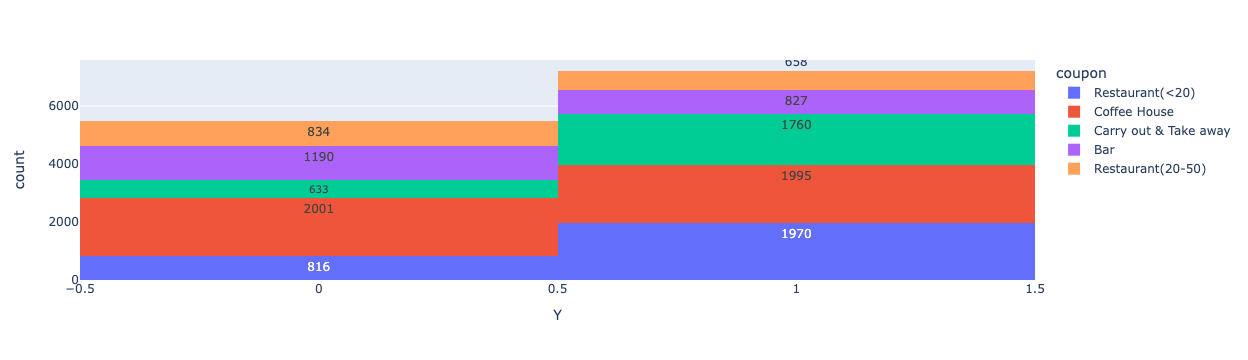

In [436]:
accept_ratio = data['Y'].value_counts(normalize=True)
print(accept_ratio[1])
fig = px.histogram(data, x='Y', color='coupon', text_auto=True)
fig.show()

5. Use a bar plot to visualize the `coupon` column.

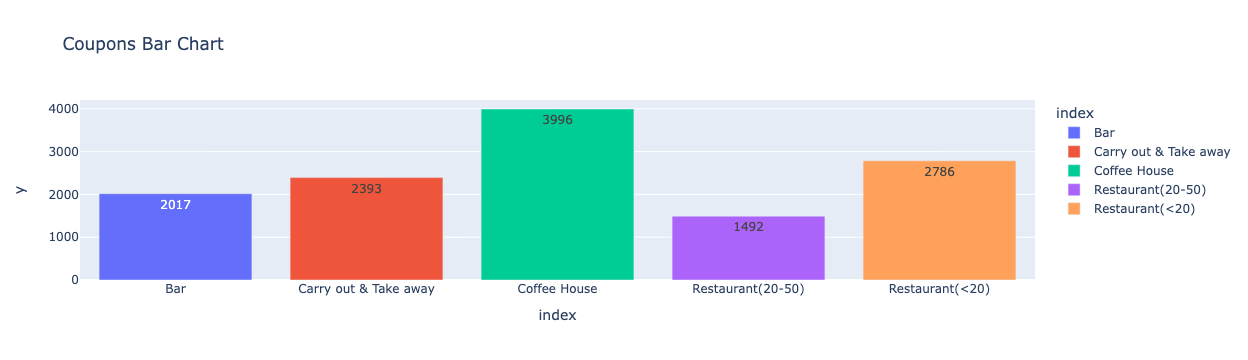

In [437]:
# Following diagram provides distribution of coupons and how eacy coupon type is accepted by customers. 
# It shows that Coffee House coupons were distributed the most, but only about 50% accepted the coupons
# Cheap restaurants coupons were the second most distributed, but accepted with higher success rate
#px.histogram(data, x='coupon', color= 'Y', title='Histogram of coupons', text_auto=True)
#px.density_heatmap(data, x='coupon', y='Y', text_auto=True)
coupons = data.groupby('coupon')['coupon'].count()
fig = px.bar(coupons, x= coupons.index, y= coupons, color= coupons.index, text_auto= True, title = "Coupons Bar Chart")
fig.show()

6. Use a histogram to visualize the temperature column.

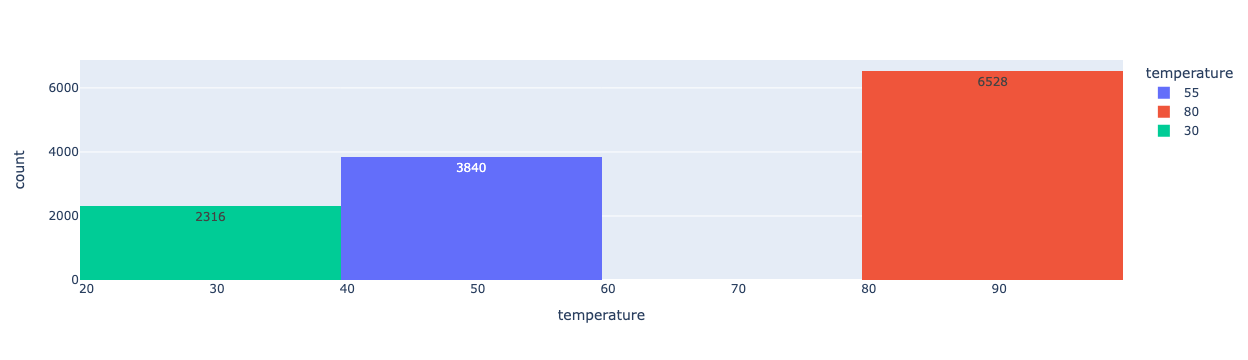

In [438]:
# Following historgram provides distribution of temperature.
fig = px.histogram(data, x='temperature', color= 'temperature', text_auto= True)
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [439]:
bar = data.query('coupon == "Bar"')
bar.shape

(2017, 26)

2. What proportion of bar coupons were accepted?


In [440]:
bar_accept_ratio = bar['Y'].value_counts(normalize= True)[1]
bar_accept_ratio

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [441]:
# Categories 'never', 'less than 1' and '1-3' cover 3 or fewer scenarios
lesst3 = ['never', 'less1', '1~3']

#Query for values within the list and get the acceptence ratio
accept_ratio_lesst3 = bar.query('Bar in @lesst3')['Y'].value_counts(normalize= True)[1]

# Negate the Query with not in 
accept_ratio_grt3 = bar.query('Bar not in @lesst3')['Y'].value_counts(normalize= True)[1]

accept_ratio_lesst3, accept_ratio_grt3

(0.37073707370737075, 0.7688442211055276)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [442]:
bar_grt1 = ['1~3','4~8', 'gt8']
age_grt25 = ['26', '31', '36', '41', '46', '50plus']

# Query with multiple conditions: First condition Going to Bar more than once, second condition age greather than 25
accept_ratio_bar_grt1 = bar.query('(Bar in @bar_grt1) & (age in @age_grt25)')['Y'].value_counts(normalize = True)[1]

# Negate the query for the rest
accept_ratio_bar_rest = bar.query('~((Bar in @bar_grt1) & (age in @age_grt25))')['Y'].value_counts(normalize = True)[1]

accept_ratio_bar_grt1, accept_ratio_bar_rest

(0.6952380952380952, 0.33500313087038197)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [443]:
bar_grt1 = ['1~3','4~8', 'gt8']
kids = ['Kid(s)']
occupations = ['Farming Fishing & Forestry']

# Query for People going to bar more than once a month, Get acceptance ratio
accept_ratio_bar_grt1 = bar.query('Bar in @bar_grt1')['Y'].value_counts(normalize = True)[1]

# Query and get value counts for people not having kids as passengers, Get acceptance ratio
accept_ratio_not_kids = bar.query('passanger not in @kids')['Y'].value_counts(normalize = True)[1]

# Query and get value counts for peopole who aren't farmers, Get acceptance ratio
accept_ratio_not_farmers = bar.query('occupation not in @occupations')['Y'].value_counts(normalize = True)[1]

accept_ratio_bar_grt1, accept_ratio_not_kids, accept_ratio_not_farmers

(0.6879194630872483, 0.43290999447818884, 0.4098605577689243)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [444]:
bar_grt1 = ['1~3','4~8', 'gt8']
under_30 = ['21', '26', 'below21']
restaurant_grt_4 = ['4~8','gt8']
income_lessthan_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# Query and get value counts for Widowed People who goes to Bar more than once a month and don't have kids as passengers
accept_ratio_notWidowed_noKids_grt1 = bar.query('(Bar in @bar_grt1)&(passanger != "Kid(s)")&(maritalStatus != "Widowed")')['Y'].value_counts(normalize = True)[1]

# Query and get value counts for people who goes to bar more than once a month and under age 30
accept_ratio_under30_grt1 = bar.query('(Bar in @bar_grt1) & (age in @under_30)')['Y'].value_counts(normalize = True)[1]

# Query and get value counts for Peopole whose income is under 50K and goes to cheap restaurants more than 4 times a month
accept_ratio_cheap_restaurant_incomeUnder50k = bar.query('(RestaurantLessThan20 in @restaurant_grt_4) & (income in @income_lessthan_50k)')['Y'].value_counts(normalize = True)[1]

accept_ratio_notWidowed_noKids_grt1, accept_ratio_under30_grt1, accept_ratio_cheap_restaurant_incomeUnder50k


(0.7132486388384754, 0.7217391304347827, 0.45348837209302323)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## First observation
Customers who goes to bars more than 3 times a month are highly likely to accept the coupons, with acceptence percentage above 70.

## Second observation
customers under 25 and goes less than 3 times are very unlikely accept the coupons, with acceptence percentage of less than 35.

## Third observation
Similarly, customer under 30 and goes to bar more than once to bar are highly likely to accept the coupons, with acceptence percentage above 70

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Sorted Distributed coupons = Index(['Coffee House', 'Restaurant(<20)', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'],
      dtype='object', name='coupon')
Sorted Coupons by Acceptence Ratio = Index(['Carry out & Take away', 'Restaurant(<20)', 'Coffee House',
       'Restaurant(20-50)', 'Bar'],
      dtype='object', name='coupon')


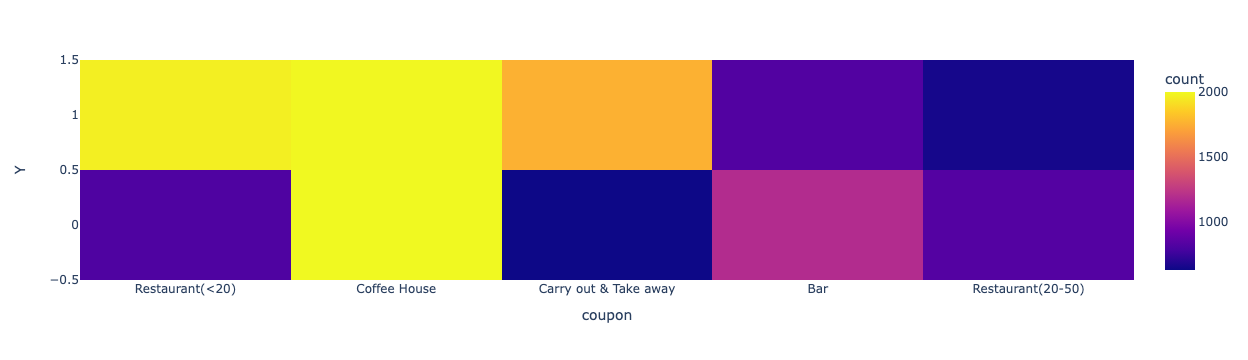

In [445]:
coupons = data.groupby('coupon')['coupon'].count().sort_values(ascending = False)
print("Sorted Distributed coupons = {}".format(coupons.index))
#print(data.groupby('coupon')['Y'].value_counts(normalize = True).index)
coupons_acceptence = data.groupby('coupon')['Y'].value_counts(normalize = True).sort_values(ascending = False, axis = 0).xs(1, level= 'Y')
print("Sorted Coupons by Acceptence Ratio = {}".format(coupons_acceptence.index))
fig = px.density_heatmap(data, x='coupon', y='Y')
fig.show()

# Observations
1. #### Based on sorted values, 
* #### &emsp;  We could say that "Coffe House", "Cheap Resturants" and "Carry out" are the 3 most popular coupons.
* #### &emsp;  And among these categories, "Cheap restaurants" and "Carry out" have higher acceptence ratios.

###  Investigate Carry Out use case futher and check if there are any futher insights

In [446]:
data.CarryAway.unique()

array(['1~3', '4~8', 'gt8', 'less1', 'never'], dtype=object)

CarryAway
4~8      0.753659
never    0.750000
1~3      0.739278
gt8      0.738411
less1    0.679887
Name: proportion, dtype: float64


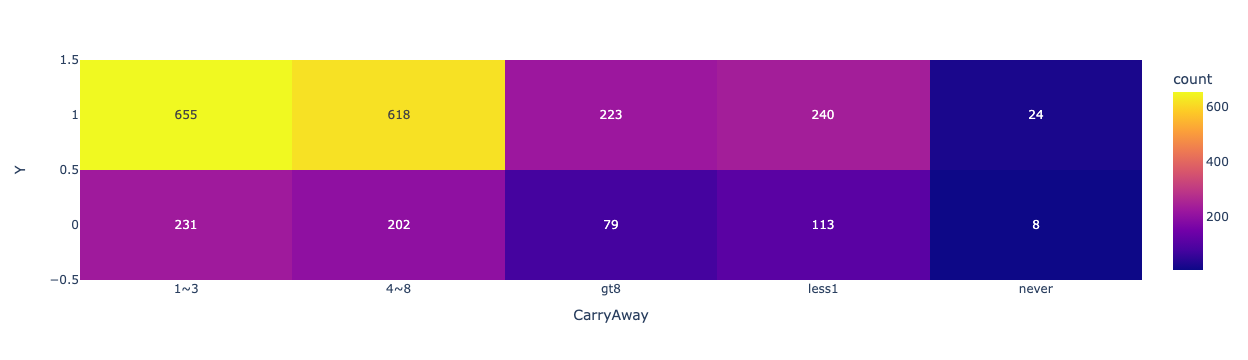

In [447]:
print(data.query('coupon == "Carry out & Take away"').groupby('CarryAway')['Y'].value_counts(normalize= True).
      sort_values(ascending= False, axis=0).xs(1, level= 'Y'))
fig = px.density_heatmap(data.query('coupon == "Carry out & Take away"'), x= 'CarryAway', y='Y', text_auto= True )
fig.show()

#### &emsp;2. People who takes carry out orders 4-8 times a month have the highest acceptence rate. 
#### &emsp;&emsp;Surprisingly, people takes the orders more than 8 times has one of the least acceptance rate.
### Let's see if people driving in the same direction are more likely to accept the coupons

In [448]:
acceptance_ration_same_direction = data.query('(coupon == "Carry out & Take away") & (direction_same == True)')['Y'].value_counts(normalize= True)[1]

carry_out_acceptence_rate = data.groupby('coupon')['Y'].value_counts(normalize= True)['Carry out & Take away'][1]
acceptance_ration_same_direction, carry_out_acceptence_rate

(0.7036569987389659, 0.7354784788967823)

#### 3. &emsp;People driving in the same direction has acceptence ratio of right 70%, while aceeceptance ratio for Carry Out is 73%. 
#### &emsp;&emsp; So, same_direction doesn't seem to be a factor.
###  Let's see how likely people having passengers in the car to accept coupons

passanger
Friend(s)    0.757781
Partner      0.731959
Alone        0.727402
Kid(s)       0.703947
Name: proportion, dtype: float64


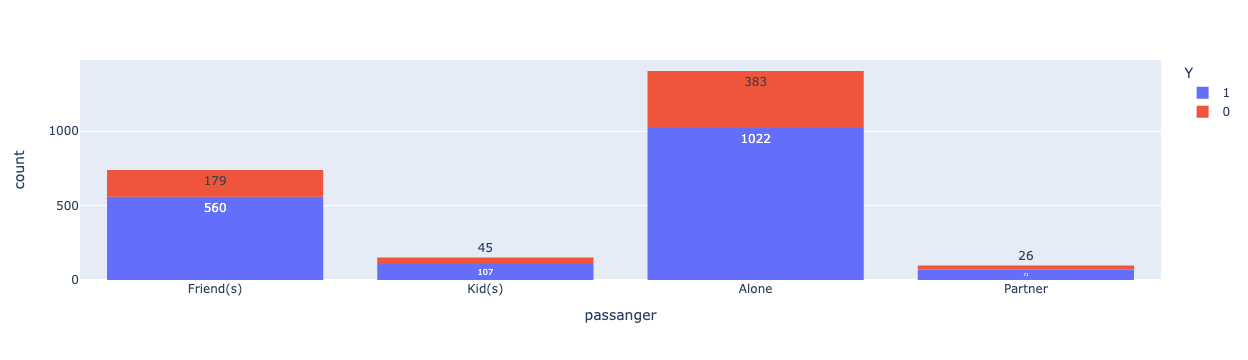

In [449]:
passenger_acceptence = data.query('coupon == "Carry out & Take away"').groupby('passanger')['Y'].value_counts(normalize = True).sort_values(ascending = False).xs(1, level='Y')
print(passenger_acceptence)
fig = px.histogram(data.query('coupon == "Carry out & Take away"'), x= 'passanger', color='Y', text_auto=True)
fig.show()

#### 4. &emsp;Based on histogram data, it seems that People with friends as passengers accept 75%, while 
####    &emsp;&emsp;people with kids as passengers accept 70% of the time.

## Now Let's analyze people who were given Cheap restaurant coupons

In [450]:
data.coupon.unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

RestaurantLessThan20
gt8      0.760417
4~8      0.717500
1~3      0.706926
less1    0.673913
never    0.555556
Name: proportion, dtype: float64


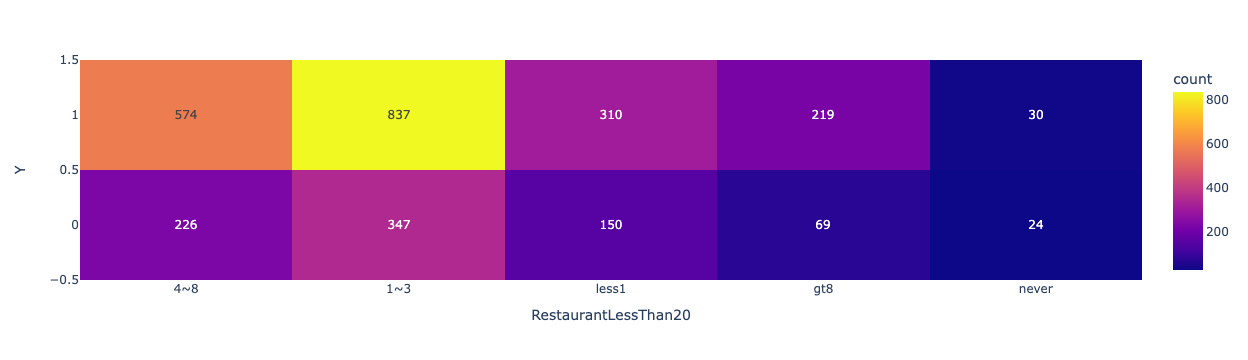

In [451]:
cheap_restaurant_coupons = data.query('coupon == "Restaurant(<20)"').groupby('RestaurantLessThan20')['Y'].value_counts(normalize = True).sort_values(ascending = False).xs(1, level='Y')
print(cheap_restaurant_coupons)
fig = px.density_heatmap(data.query('coupon == "Restaurant(<20)"'), x='RestaurantLessThan20', y='Y', text_auto=True)
fig.show()

#### &emsp; 5. People who goes to cheap restaurants more than 8 times a month accept 75% of time, 
#### &emsp;&emsp;   while people who never goes to restaurant accepted around 50%

### Let's analyze coupon distribution for cheap restaurants by profession

occupation
Unemployed                                   411
Student                                      345
Computer & Mathematical                      300
Sales & Related                              238
Education&Training&Library                   221
Management                                   187
Arts Design Entertainment Sports & Media     136
Office & Administrative Support              136
Business & Financial                         127
Retired                                      111
Food Preparation & Serving Related            69
Healthcare Support                            53
Healthcare Practitioners & Technical          51
Community & Social Services                   50
Legal                                         49
Transportation & Material Moving              46
Personal Care & Service                       39
Architecture & Engineering                    39
Protective Service                            38
Life Physical Social Science                  36
Construct

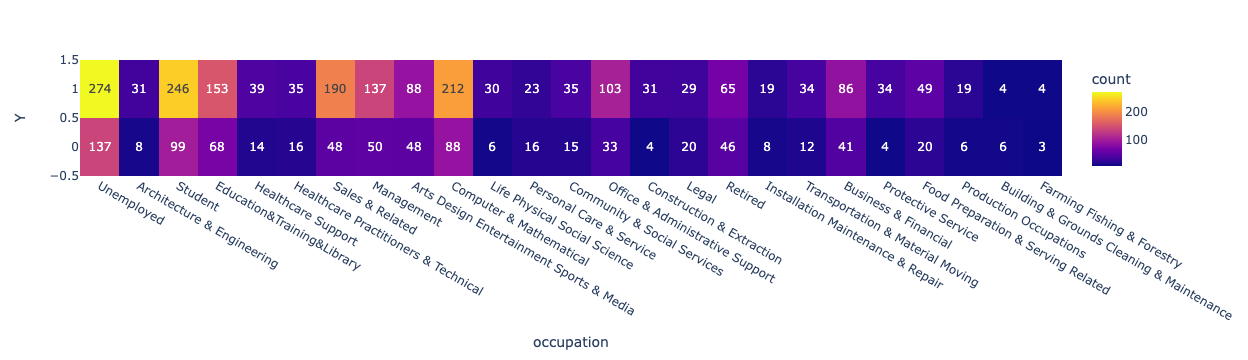

In [452]:
coupons_sorted = data.query('coupon == "Restaurant(<20)"').groupby('occupation')['occupation'].count().sort_values(ascending = False)
print(coupons_sorted)
cheap_restaurant_occupation = data.query('coupon == "Restaurant(<20)"').groupby('occupation')['Y'].value_counts(normalize= True).sort_values(ascending = False).xs(1, level= 'Y')
print(cheap_restaurant_occupation)
fig = px.density_heatmap(data.query('coupon == "Restaurant(<20)"'), x='occupation', y='Y', text_auto=True)
fig.show()

#### &emsp; 6. Unemployed, students and Computer professionals got the most coupons.
#### &emsp;&emsp; But Security professionals, construction & life sciences professionals accept the most (89, 88, 83 percent successively) 

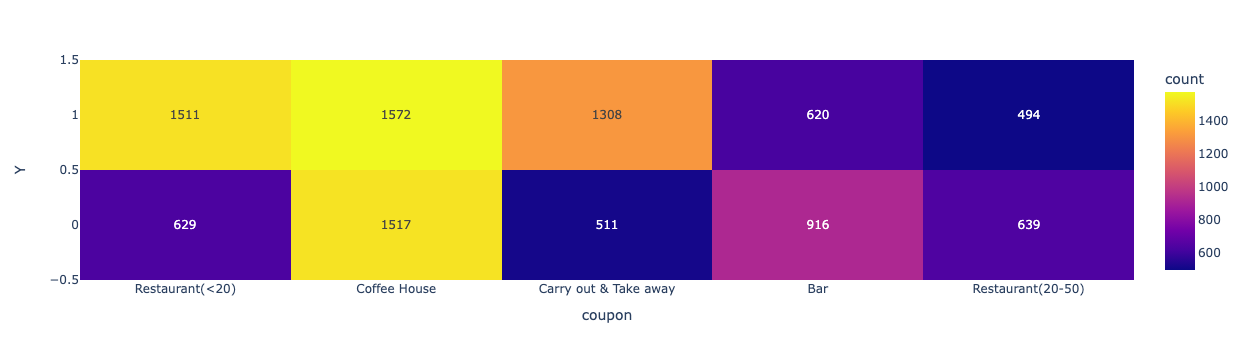

In [453]:
professionals = ['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library','Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Legal', 'Business & Financial']
fig = px.density_heatmap(data.query('occupation in @professionals'), x='coupon', y= 'Y',text_auto=True)
fig.show()